<a href="https://colab.research.google.com/github/ycarrera01/Miner-a-de-datos/blob/main/An%C3%A1lisisIPHEestadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
#Se cargan las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import classification_report




In [43]:
# Cargar dataset
df = pd.read_excel("agrupado.xlsx")

In [44]:
#Comprobar que la data está cargada correctamente
df.head ()

,Fecha_Cierre,Año,Mes,Número_mes,"Escuela, Programa, Extensión",C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
0,2021-01-31,2021,Enero,1,Escuela de Enseñanza Especial,1476,876,600,0,0,0,0,0,0
1,2021-01-31,2021,Enero,1,Escuela Vocacional Especial,593,374,219,0,853,543,310,0,0
2,2021-01-31,2021,Enero,1,Escuela de Sordos,1006,624,382,0,24,11,13,0,0
3,2021-01-31,2021,Enero,1,Escuela de Ciegos Hellen Keller,145,94,51,0,105,51,54,0,0
4,2021-01-31,2021,Enero,1,Programa de Autismo,281,199,82,0,76,65,11,0,0


In [45]:
# Busco conocer el tipo de datos que tiene el dataset
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Fecha_Cierre                  525 non-null    datetime64[ns]
 1   Año                           525 non-null    int64         
 2   Mes                           525 non-null    object        
 3   Número_mes                    525 non-null    int64         
 4   Escuela, Programa, Extensión  525 non-null    object        
 5    C_E_Total                    525 non-null    int64         
 6   C_E_Hombre                    525 non-null    int64         
 7   C_E_Mujer                     525 non-null    int64         
 8   C_E_Contactado                525 non-null    int64         
 9   IPHE_Total                    525 non-null    int64         
 10  IPHE_Hombre                   525 non-null    int64         
 11  IPHE_Mujer                    52

In [46]:
#Aplicar la estadistica descriptiva para entender el comportamiento de los datos
df.describe ()

,Fecha_Cierre,Año,Número_mes,C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
count,525,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,2022-02-01 00:57:36,2021.560000,6.360000,536.579048,133.180952,77.767619,149.337143,226.828571,62.529524,36.598095,56.967619,10.815238
min,2021-01-31 00:00:00,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-07-31 00:00:00,2021.000000,3.000000,250.000000,0.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-01-31 00:00:00,2022.000000,6.000000,373.000000,0.000000,0.000000,0.000000,162.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-07-31 00:00:00,2022.000000,9.000000,837.000000,199.000000,101.000000,153.000000,284.000000,95.000000,56.000000,25.000000,0.000000
max,2023-03-31 00:00:00,2023.000000,12.000000,1528.000000,955.000000,641.000000,1431.000000,1382.000000,839.000000,543.000000,862.000000,224.000000
std,NaN,0.571859,3.454436,392.375507,223.659245,137.825033,316.069230,227.608017,126.136927,74.783073,139.498656,26.269343


In [47]:
print(df.columns.tolist())

['Fecha_Cierre', 'Año', 'Mes', 'Número_mes', 'Escuela, Programa, Extensión', ' C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado', 'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados', 'Ctd_Docentes']


In [85]:
# Lista de columnas a evaluar se seleccionan las numéricas int64
columnas_numericas = [
    ' C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado', 'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados', 'Ctd_Docentes'
]

# Agrupar por mes.
# y verificar si todas las columnas numéricas son cero en cada grupo
meses_validos = df.groupby("Fecha_Cierre")[columnas_numericas].sum().ne(0).any(axis=1)


In [86]:
# se crea una copia de dataframe para que se guarden los cambios
df_limpio = df.copy()

# Los datos publicados presentan incosistencias mes a mes, y es que no todos los
# meses se publicaban todos los datos de las variables de estudio.
# Con la ayuda de este código se busca que si la columna está totalmente en cero para
# ese mes se reemplace a NaN para que los resultados no se afecten
for mes, grupo in df.groupby("Fecha_Cierre"):
    for col in columnas_numericas:
        if grupo[col].sum() == 0:

            df_limpio.loc[df["Fecha_Cierre"] == mes, col] = np.nan

In [87]:
# Confirmando los resultados
df_limpio[df_limpio["Fecha_Cierre"] == "11/30/2022"][columnas_numericas]

,C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
462,1396,864.0,532.0,NaN,0,0.0,0.0,NaN,NaN
463,592,412.0,180.0,NaN,897,563.0,334.0,NaN,NaN
464,1022,614.0,408.0,NaN,32,19.0,13.0,NaN,NaN
465,166,99.0,67.0,NaN,104,62.0,42.0,NaN,NaN
466,329,228.0,101.0,NaN,130,108.0,22.0,NaN,NaN
467,405,256.0,149.0,NaN,183,126.0,57.0,NaN,NaN
468,367,244.0,123.0,NaN,178,106.0,72.0,NaN,NaN
469,390,241.0,149.0,NaN,0,0.0,0.0,NaN,NaN
470,229,141.0,88.0,NaN,198,123.0,75.0,NaN,NaN
471,147,99.0,48.0,NaN,160,103.0,57.0,NaN,NaN


In [88]:
# Quisiera eliminar unas columnas innecesarias ya que de ellas se indica la Fecha_Cierre
columnas_a_eliminar = ['Año', 'Mes', 'Número_mes']

df_limpio = df_limpio.drop(columns=[col for col in columnas_a_eliminar if col in df_limpio.columns])

In [105]:
# La data que fue publicada mes a mes presentaba variaciones, sin embargo uno de los
# datos que no varió era los totales reportados, mí intención rellenar los campos
# con la proporción más real entre hombres y mujeres pero que la suma de ambos sea el total
# Cálculo de proporciones promedio reales.
df_validos_ce = df_limpio.dropna(subset=['C_E_Hombre', 'C_E_Mujer', 'C_E_Total'])
df_validos_iphe = df_limpio.dropna(subset=['IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Total'])

# Proporción promedio de hombres y mujeres
p_ce_hombre = (df_validos_ce['C_E_Hombre'] / df_validos_ce['C_E_Total']).mean()
p_ce_mujer = 1 - p_ce_hombre

p_iphe_hombre = (df_validos_iphe['IPHE_Hombre'] / df_validos_iphe['IPHE_Total']).mean()
p_iphe_mujer = 1 - p_iphe_hombre

In [93]:
# Imputar C_E_Hombre y C_E_Mujer si falta alguno
df_limpio['C_E_Hombre'] = df_limpio.apply(
    lambda row: p_ce_hombre * row[' C_E_Total'] if pd.isna(row['C_E_Hombre']) else row['C_E_Hombre'],
    axis=1
)

df_limpio['C_E_Mujer'] = df_limpio.apply(
    lambda row: p_ce_mujer * row[' C_E_Total'] if pd.isna(row['C_E_Mujer']) else row['C_E_Mujer'],
    axis=1
)

# Imputar IPHE_Hombre y IPHE_Mujer si falta alguno
df_limpio['IPHE_Hombre'] = df_limpio.apply(
    lambda row: p_iphe_hombre * row['IPHE_Total'] if pd.isna(row['IPHE_Hombre']) else row['IPHE_Hombre'],
    axis=1
)

df_limpio['IPHE_Mujer'] = df_limpio.apply(
    lambda row: p_iphe_mujer * row['IPHE_Total'] if pd.isna(row['IPHE_Mujer']) else row['IPHE_Mujer'],
    axis=1
)

In [94]:
 df_limpio.info ()  ## Evaluando al data set limpio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Fecha_Cierre                  525 non-null    datetime64[ns]
 1   Escuela, Programa, Extensión  525 non-null    object        
 2    C_E_Total                    525 non-null    int64         
 3   C_E_Hombre                    525 non-null    float64       
 4   C_E_Mujer                     525 non-null    float64       
 5   C_E_Contactado                147 non-null    float64       
 6   IPHE_Total                    525 non-null    int64         
 7   IPHE_Hombre                   525 non-null    float64       
 8   IPHE_Mujer                    525 non-null    float64       
 9   IPHE_Contactados              147 non-null    float64       
 10  Ctd_Docentes                  105 non-null    float64       
dtypes: datetime64[ns](1), float64(7)

In [95]:
df_limpio.describe ()

,Fecha_Cierre,C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
count,525,525.000000,525.000000,525.000000,147.000000,525.000000,525.000000,525.000000,147.000000,105.000000
mean,2022-02-01 00:57:36,536.579048,340.727320,195.851727,533.346939,226.828571,142.093202,84.923941,203.455782,54.076190
min,2021-01-31 00:00:00,0.000000,0.000000,0.000000,104.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,2021-07-31 00:00:00,250.000000,159.341941,91.020692,250.000000,96.000000,58.480050,34.008463,90.000000,31.000000
50%,2022-01-31 00:00:00,373.000000,240.000000,134.000000,376.000000,162.000000,103.000000,61.215234,153.000000,40.000000
75%,2022-07-31 00:00:00,837.000000,533.476817,303.523183,841.000000,284.000000,179.000000,100.000000,270.000000,80.000000
max,2023-03-31 00:00:00,1528.000000,955.000000,641.000000,1431.000000,1382.000000,839.000000,543.000000,862.000000,224.000000
std,NaN,392.375507,246.125243,148.122934,390.296141,227.608017,142.442851,85.685090,199.585297,33.392392


,C_E_Total,C_E_Hombre,C_E_Mujer,C_E_Contactado,IPHE_Total,IPHE_Hombre,IPHE_Mujer,IPHE_Contactados,Ctd_Docentes
C_E_Total,1.000000,0.997146,0.992100,0.998807,0.108235,0.102337,0.115807,0.166477,0.713694
C_E_Hombre,0.997146,1.000000,0.979797,0.998807,0.120262,0.115092,0.126489,0.166477,0.713694
C_E_Mujer,0.992100,0.979797,1.000000,0.998807,0.086881,0.079847,0.096593,0.166477,0.713694
C_E_Contactado,0.998807,0.998807,0.998807,1.000000,0.141621,0.141621,0.141621,0.157774,nan
IPHE_Total,0.108235,0.120262,0.086881,0.141621,1.000000,0.998421,0.996278,0.995725,0.483244
IPHE_Hombre,0.102337,0.115092,0.079847,0.141621,0.998421,1.000000,0.990628,0.995725,0.483244
IPHE_Mujer,0.115807,0.126489,0.096593,0.141621,0.996278,0.990628,1.000000,0.995725,0.483244
IPHE_Contactados,0.166477,0.166477,0.166477,0.157774,0.995725,0.995725,0.995725,1.000000,nan
Ctd_Docentes,0.713694,0.713694,0.713694,nan,0.483244,0.483244,0.483244,nan,1.000000


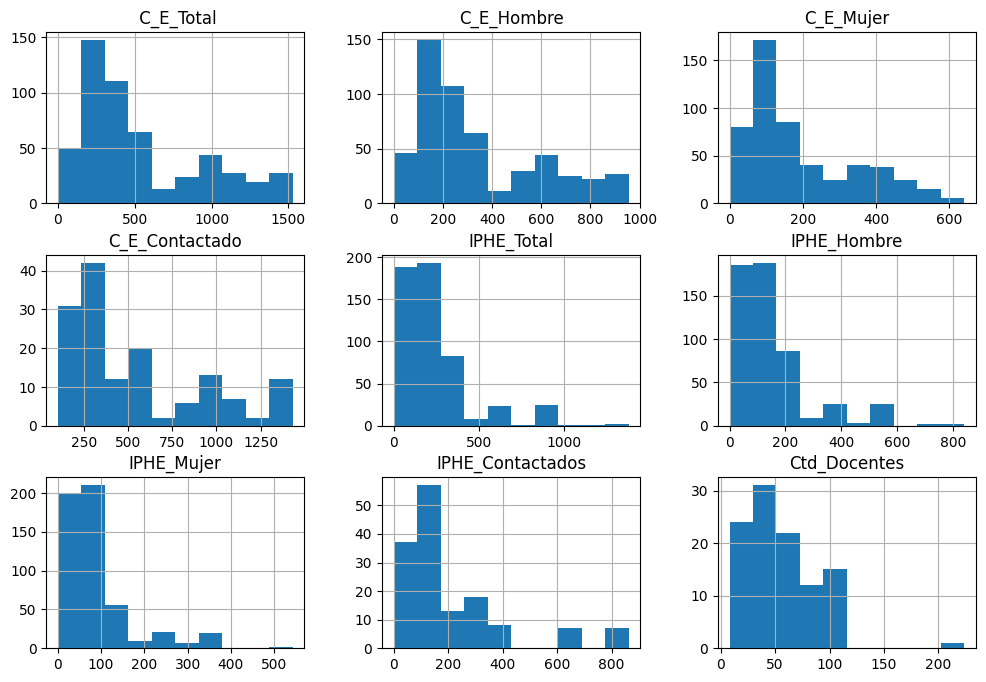

In [97]:
# Lista de columnas a evaluar se seleccionan las numéricas int64
columnas_numericas = [
    ' C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado', 'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados', 'Ctd_Docentes'
]

df_limpio[columnas_numericas].hist(figsize=(12,8))
df_limpio.corr(numeric_only=True).style.background_gradient()

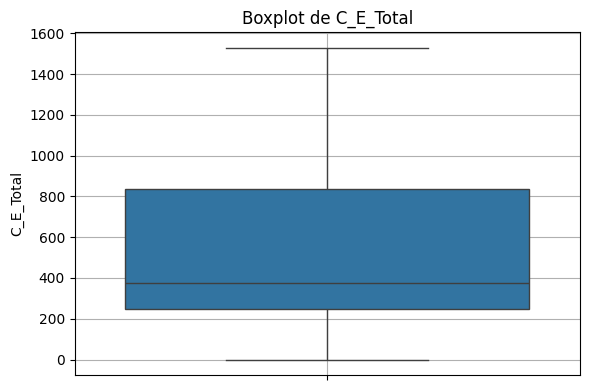

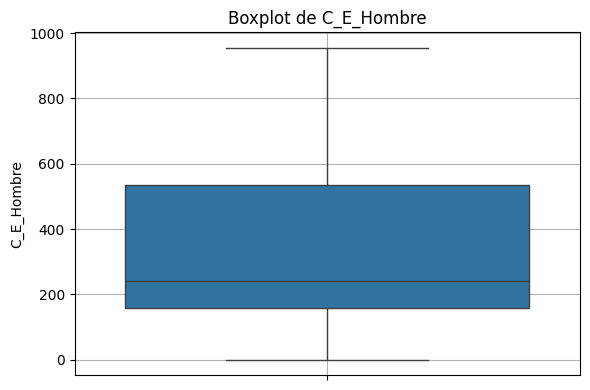

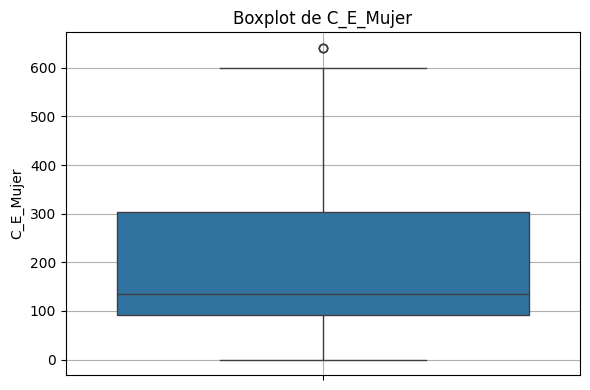

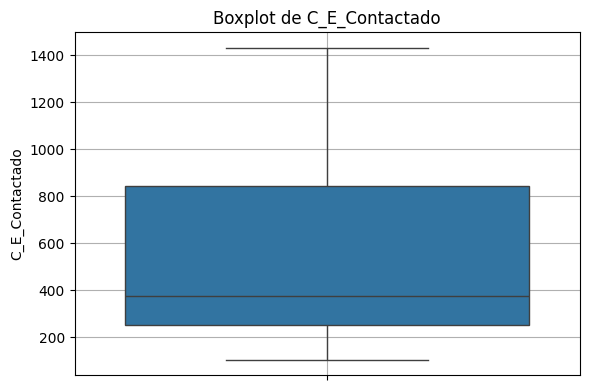

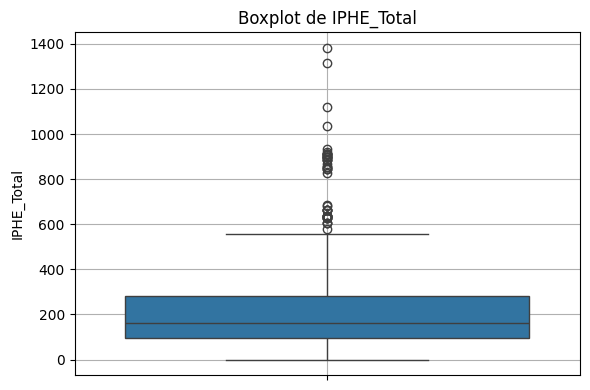

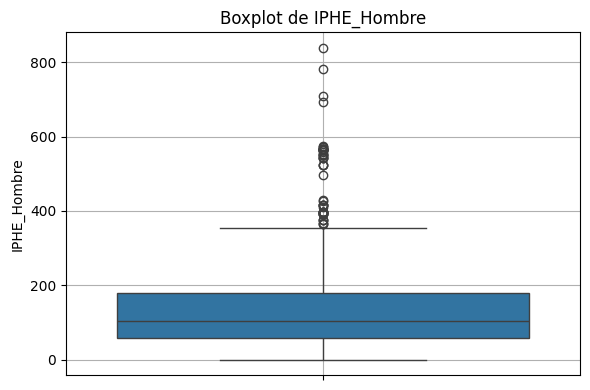

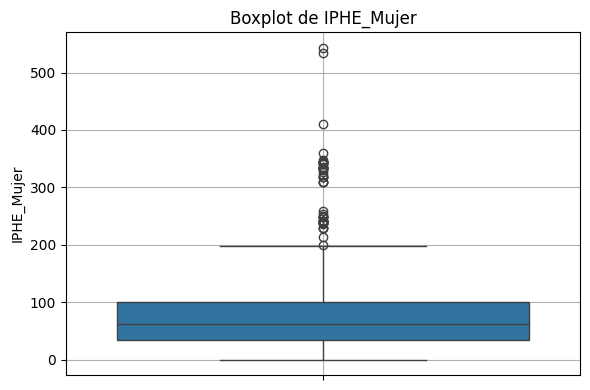

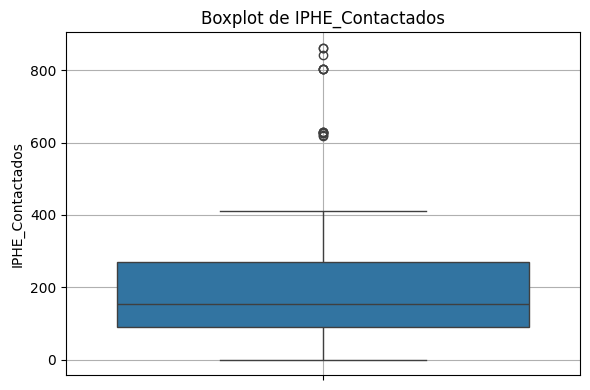

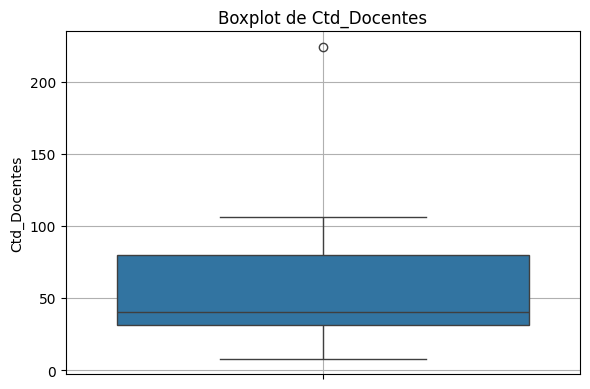

In [98]:
# Indentificar existencia de valores atípicos

# Eliminar espacios en nombres de columnas (por si acaso)
df_limpio.columns = df_limpio.columns.str.strip()

# Lista de columnas que quieres graficar
columnas = ['C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado',
            'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados',
            'Ctd_Docentes']

# Crear un boxplot por cada columna
for col in columnas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_limpio[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [99]:
df_limpio.to_excel('df_limpio.xlsx', index=False)

Ya he realizado todos los ajustes a el dataset, luego de tener finalmente mí df_limpio quiero aplicar como técnica de minería de datos al Clustering

In [102]:
# Estas son las columnas seleccionadas para el análisis, que por calidad de datos
# He decidido aplicarlo a las siguiente columnas
columnas_cluster = [
    'C_E_Total', 'C_E_Hombre', 'C_E_Mujer',
    'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer'
]

In [106]:
# Para aplicar K means debemos escalar los datos
X = df_limpio[columnas_cluster]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

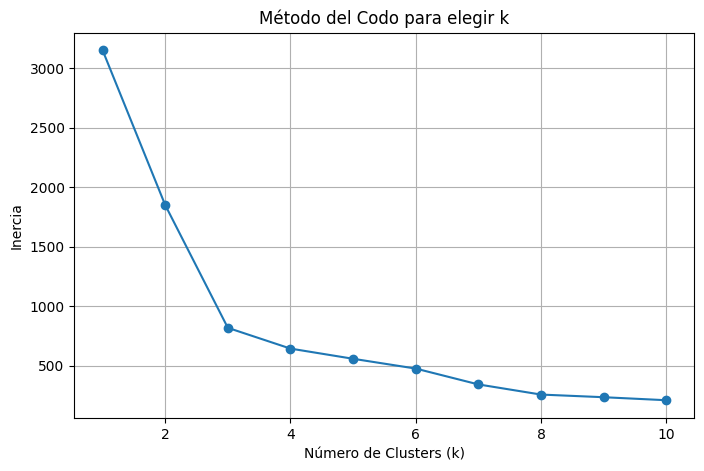

In [107]:
# Con Elbow Method la intención es definir la k optima
# Prueba varios valores de k
inercia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

# Gráfico del Codo
plt.figure(figsize=(8, 5))
plt.plot(K, inercia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para elegir k')
plt.grid(True)
plt.show()

El "codo" en la curva (el punto donde la pendiente deja de bajar rápido), Ese es el k óptimo. Para mí caso utilizaré k = 3


In [108]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [109]:
# Agrego los cluster en mí df_limpio
df_limpio['Cluster'] = labels

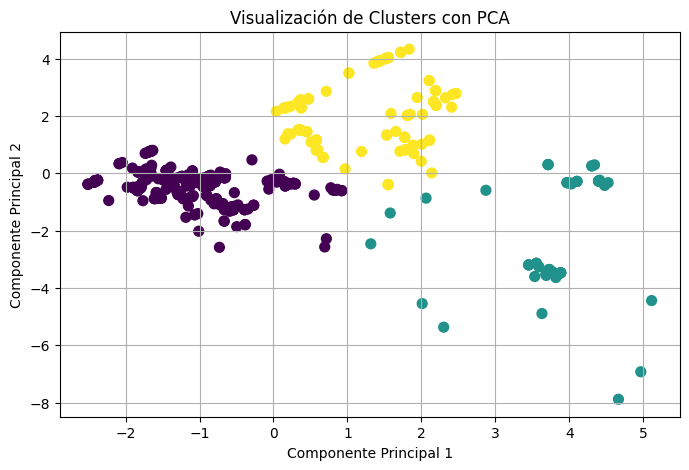

In [110]:
# Visualización de los cluster con PAC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2D para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Visualización de Clusters con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [111]:
# cómo evaluación final a este método quería conocer la calidad
sil_score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: 0.606


Resultado obtenido me indica que es un buen clustering

In [112]:
# Visualización por cluster
df_limpio.groupby('Cluster')[columnas_cluster].mean()

,C_E_Total,C_E_Hombre,C_E_Mujer,IPHE_Total,IPHE_Hombre,IPHE_Mujer
Cluster,,,,,,
0,291.614706,186.910578,104.704128,162.311765,102.785560,59.817381
1,791.672414,507.936802,283.735611,778.172414,486.246420,291.925994
2,1075.889764,676.156790,399.732974,147.755906,90.153921,57.601985


In [134]:
# Agrupar por centro y sacar promedios por columna
df_agrupado = df_limpio.groupby("Escuela, Programa, Extensión")[columnas_numericas].mean()

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_agrupado)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_agrupado["cluster"] = kmeans.fit_predict(X_scaled)

df_agrupado[["cluster"]]



,cluster
"Escuela, Programa, Extensión",
Escuela Vocacional Especial,2
Escuela de Ciegos Hellen Keller,1
Escuela de Enseñanza Especial,0
Escuela de Sordos,0
Extensión de Aguadulce,1
Extensión de Antón,1
Extensión de Bocas Del Toro,1
Extensión de Chiriquí,0
Extensión de Colón,1


Como cloclusión podría mencionar que la segmentación está bien definida ya que permite indentificar diferentes perfiles de Escuela, programa o extensión:
- Pequeños y con poca atención especial (Cluster 0)
- Moderados con énfasis en mujeres en el IPHE (Cluster 1)
- Grandes con alta atención (cluster 2)

Iniciaré el proceso para entrenar ahora un modelo supervisado

In [139]:
# Definir la variable objetivo (target)
target_column = 'Cluster'  # Esto depende de tu columna objetivo. Podría ser el 'Cluster' que ya tienes.

# Separar las características (features) y la variable objetivo (target)
X = df_limpio[columnas_numericas]  # Características
y = df_limpio[target_column]  # Variable objetivo (target)

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [140]:
# Hacer predicciones en los datos de prueba
y_pred = rf.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        33

    accuracy                           0.99       105
   macro avg       0.99      0.97      0.98       105
weighted avg       0.99      0.99      0.99       105



In [142]:
# Entrenar el modelo SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)



SVC(random_state=42)

In [143]:
# Hacer predicciones y evaluar
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        33

    accuracy                           0.99       105
   macro avg       0.99      0.97      0.98       105
weighted avg       0.99      0.99      0.99       105

